In [5]:
import pandas as pd

In [6]:
import os
print(os.getcwd())

C:\Users\johnw


In [8]:
import os
print(os.getcwd())

C:\Users\johnw


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Explore the data
print("Column Names:")
print(df.columns)
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataFrame Information:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())

Column Names:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [10]:
# Filter data for Kenya
kenya_df = df[df['location'] == 'Kenya'].copy()

# Let's check the first few rows of the filtered data
print(kenya_df.head())

# And let's see how many rows and columns we now have
print(f"\nShape of Kenya DataFrame: {kenya_df.shape}")

       iso_code continent location        date  total_cases  new_cases  \
157787      KEN    Africa    Kenya  2020-01-03          NaN        0.0   
157788      KEN    Africa    Kenya  2020-01-04          NaN        0.0   
157789      KEN    Africa    Kenya  2020-01-05          NaN        0.0   
157790      KEN    Africa    Kenya  2020-01-06          NaN        0.0   
157791      KEN    Africa    Kenya  2020-01-07          NaN        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
157787                 NaN           NaN         0.0                  NaN   
157788                 NaN           NaN         0.0                  NaN   
157789                 NaN           NaN         0.0                  NaN   
157790                 NaN           NaN         0.0                  NaN   
157791                 NaN           NaN         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
157787  ...

In [11]:
# Convert the 'date' column to datetime objects
kenya_df['date'] = pd.to_datetime(kenya_df['date'])

# Verify the data type of the 'date' column
print(kenya_df['date'].dtype)

datetime64[ns]


In [12]:
columns_to_check = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations'
]

print("Missing values in key columns for Kenya:")
print(kenya_df[columns_to_check].isnull().sum())

Missing values in key columns for Kenya:
total_cases                  71
new_cases                     0
total_deaths                 84
new_deaths                    0
total_vaccinations         1094
people_vaccinated          1146
people_fully_vaccinated    1126
new_vaccinations           1176
dtype: int64


In [13]:
# Fill initial missing values in total_cases and total_deaths with 0
kenya_df['total_cases'].fillna(0, inplace=True)
kenya_df['total_deaths'].fillna(0, inplace=True)

# Verify if the initial missing values are filled (check the first few rows)
print(kenya_df[['date', 'total_cases', 'total_deaths']].head(10))

# Check the remaining missing values
print("\nRemaining missing values in total_cases:", kenya_df['total_cases'].isnull().sum())
print("Remaining missing values in total_deaths:", kenya_df['total_deaths'].isnull().sum())

             date  total_cases  total_deaths
157787 2020-01-03          0.0           0.0
157788 2020-01-04          0.0           0.0
157789 2020-01-05          0.0           0.0
157790 2020-01-06          0.0           0.0
157791 2020-01-07          0.0           0.0
157792 2020-01-08          0.0           0.0
157793 2020-01-09          0.0           0.0
157794 2020-01-10          0.0           0.0
157795 2020-01-11          0.0           0.0
157796 2020-01-12          0.0           0.0

Remaining missing values in total_cases: 0
Remaining missing values in total_deaths: 0


C:\Users\johnw\AppData\Local\Temp\ipykernel_3500\1550808392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kenya_df['total_cases'].fillna(0, inplace=True)
C:\Users\johnw\AppData\Local\Temp\ipykernel_3500\1550808392.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
vaccination_columns = [
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations'
]

# Fill initial missing values in vaccination columns with 0
kenya_df[vaccination_columns] = kenya_df[vaccination_columns].fillna(0)

# Verify the missing values after filling
print("\nMissing values in vaccination columns after initial fill:")
print(kenya_df[vaccination_columns].isnull().sum())

# Let's look at the first few rows of vaccination data
print("\nFirst 20 rows of vaccination data:")
print(kenya_df[['date'] + vaccination_columns].head(20))


Missing values in vaccination columns after initial fill:
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
new_vaccinations           0
dtype: int64

First 20 rows of vaccination data:
             date  total_vaccinations  people_vaccinated  \
157787 2020-01-03                 0.0                0.0   
157788 2020-01-04                 0.0                0.0   
157789 2020-01-05                 0.0                0.0   
157790 2020-01-06                 0.0                0.0   
157791 2020-01-07                 0.0                0.0   
157792 2020-01-08                 0.0                0.0   
157793 2020-01-09                 0.0                0.0   
157794 2020-01-10                 0.0                0.0   
157795 2020-01-11                 0.0                0.0   
157796 2020-01-12                 0.0                0.0   
157797 2020-01-13                 0.0                0.0   
157798 2020-01-14                 0.0                0.0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for the plots
sns.set_style("whitegrid")

# Plot total cases over time for Kenya
plt.figure(figsize(12, 6))
sns.lineplot(x='date', y='total_cases', data=kenya_df)
plt.title('Total COVID-19 Cases Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total deaths over time for Kenya
plt.figure(figsize(12, 6))
sns.lineplot(x='date', y='total_deaths', data=kenya_df)
plt.title('Total COVID-19 Deaths Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'figsize' is not defined

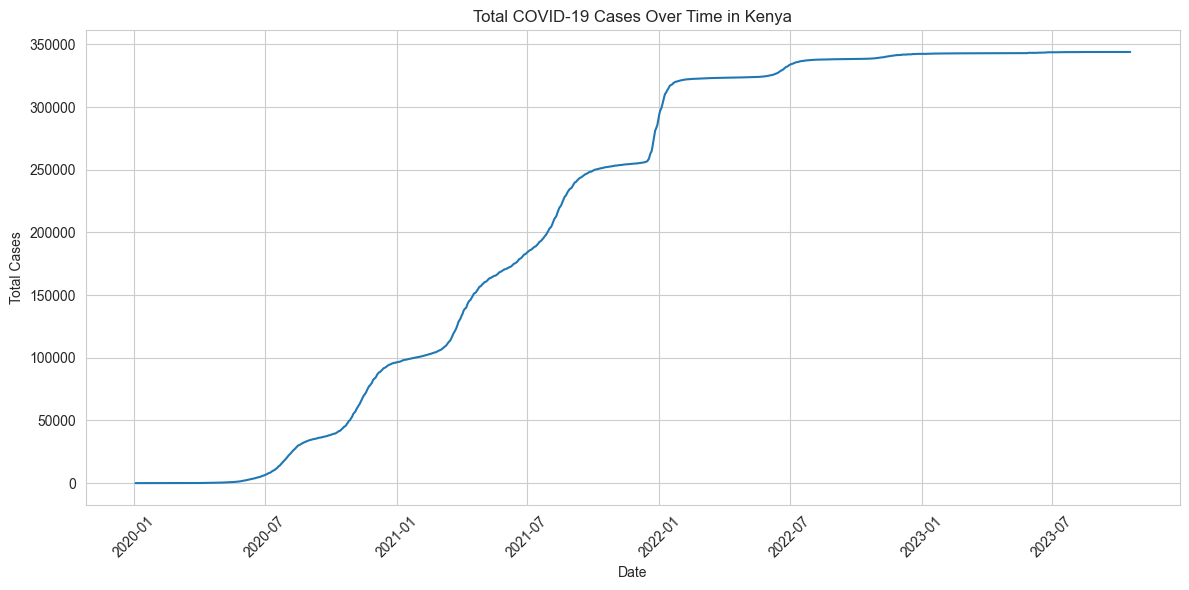

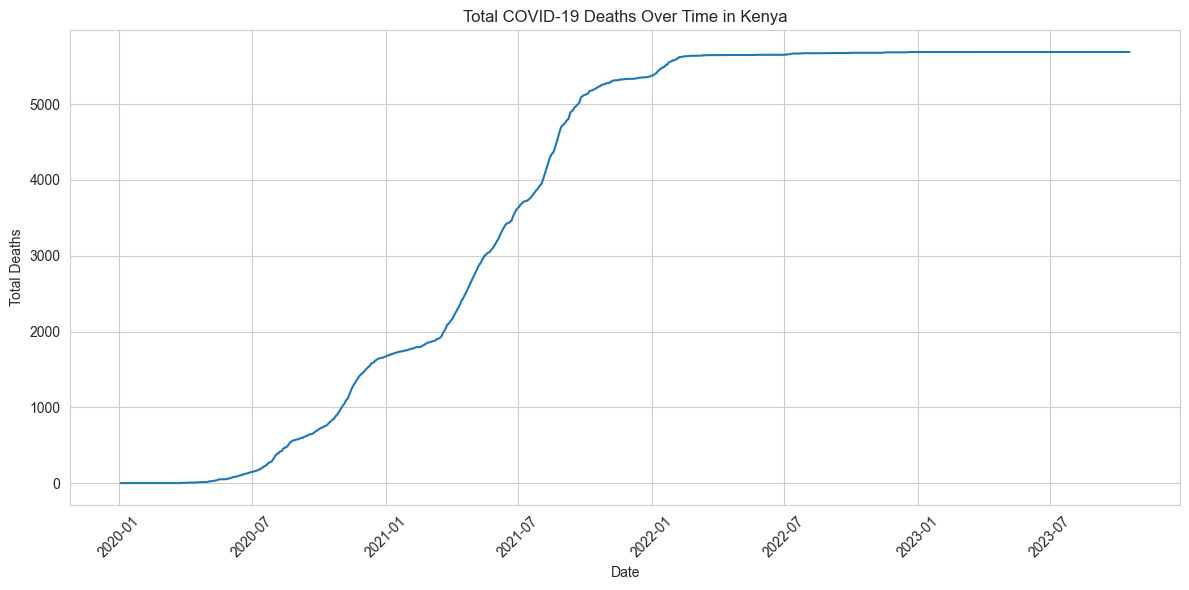

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for the plots
sns.set_style("whitegrid")

# Plot total cases over time for Kenya
plt.figure(figsize=(12, 6))  # Corrected line
sns.lineplot(x='date', y='total_cases', data=kenya_df)
plt.title('Total COVID-19 Cases Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total deaths over time for Kenya
plt.figure(figsize=(12, 6))  # Corrected line
sns.lineplot(x='date', y='total_deaths', data=kenya_df)
plt.title('Total COVID-19 Deaths Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

             date  total_cases  total_deaths  death_rate
157787 2020-01-03          0.0           0.0         NaN
157788 2020-01-04          0.0           0.0         NaN
157789 2020-01-05          0.0           0.0         NaN
157790 2020-01-06          0.0           0.0         NaN
157791 2020-01-07          0.0           0.0         NaN


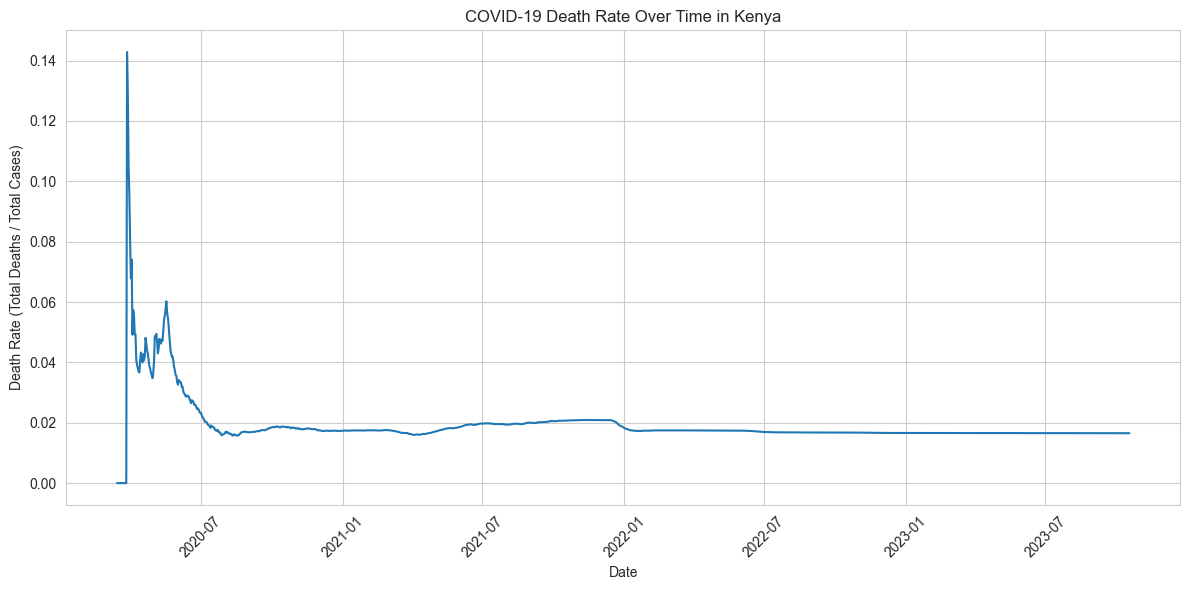

In [17]:
# Calculate the death rate
kenya_df['death_rate'] = kenya_df['total_deaths'] / kenya_df['total_cases']

# Print the first few rows with the death rate
print(kenya_df[['date', 'total_cases', 'total_deaths', 'death_rate']].head())

# Plot the death rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='death_rate', data=kenya_df)
plt.title('COVID-19 Death Rate Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

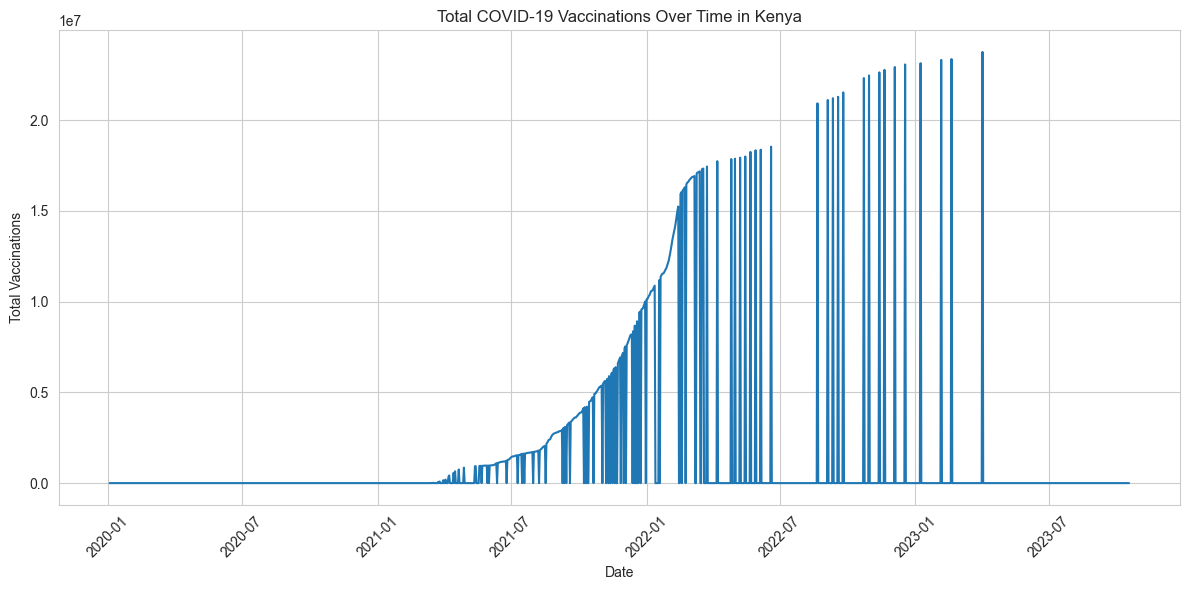

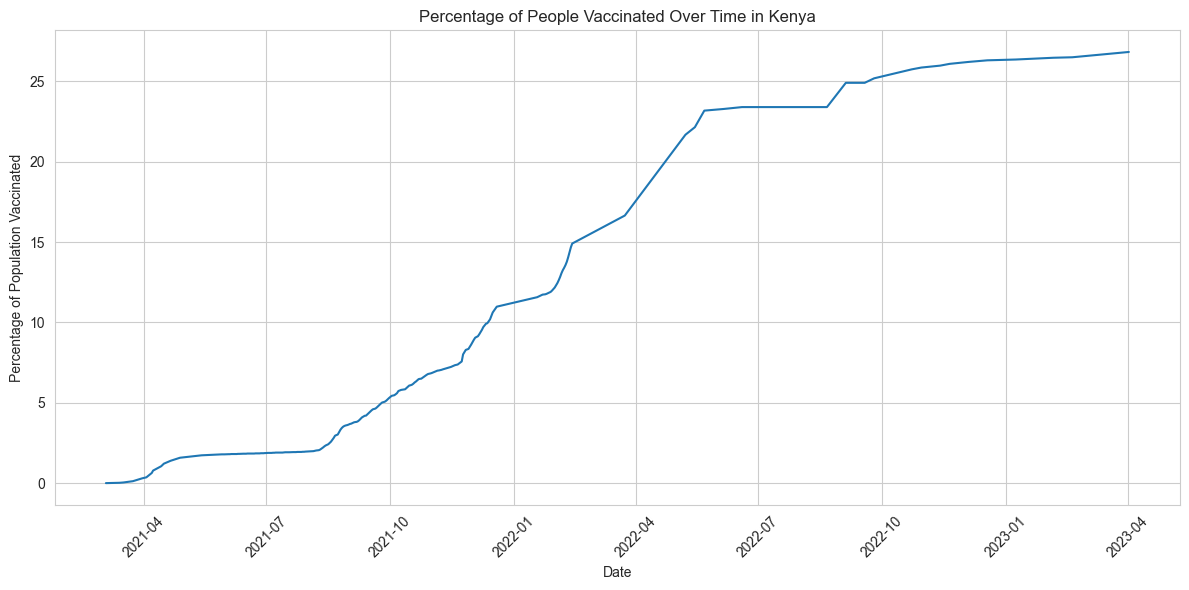

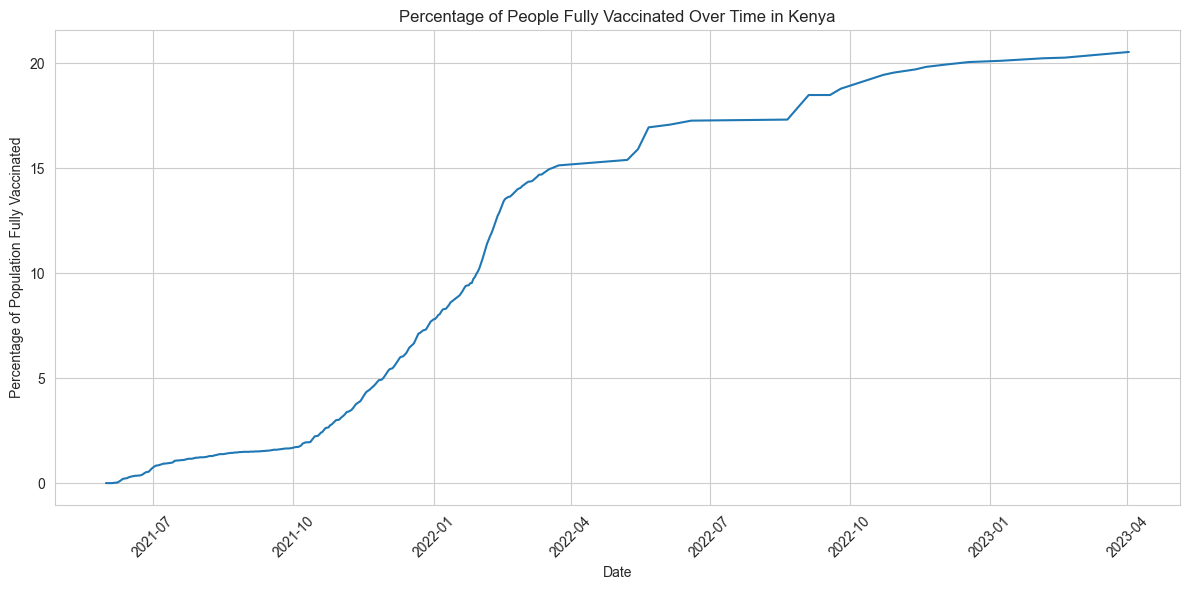

In [18]:
# Plot cumulative vaccinations over time for Kenya
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_vaccinations', data=kenya_df)
plt.title('Total COVID-19 Vaccinations Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot percentage of vaccinated population over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='people_vaccinated_per_hundred', data=kenya_df)
plt.title('Percentage of People Vaccinated Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Percentage of Population Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot percentage of fully vaccinated population over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='people_fully_vaccinated_per_hundred', data=kenya_df)
plt.title('Percentage of People Fully Vaccinated Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Percentage of Population Fully Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Insights from COVID-19 Data Analysis for Kenya:

Initial Phase (Early 2020 - Mid 2020): The number of reported COVID-19 cases and deaths remained relatively low, suggesting a slow initial spread or effective early containment measures.

Significant Waves (Mid 2020 - Mid 2022): Kenya experienced substantial increases in both total cases and total deaths during this period, indicating significant waves of the pandemic. The curves for total cases and deaths show a clear upward trend, likely with multiple peaks corresponding to different surges.

Plateau in Deaths (Post Mid 2022): While total cases might have continued to rise (with a notable increase around July 2023), the rate of increase in total deaths appeared to slow down significantly, suggesting a potential decoupling of cases and fatalities. This could be attributed to factors like increased immunity from prior infections and vaccinations, less virulent variants, or improved treatment outcomes.

Death Rate Trends: The calculated death rate (total deaths / total cases) showed an initial period of instability (likely due to low case numbers), followed by a general decreasing trend over time. This suggests that the severity of reported infections, in terms of the proportion leading to death, may have reduced as the pandemic progressed. The death rate eventually stabilized at a lower level with minor fluctuations.

Vaccination Rollout (Started January 2021): The COVID-19 vaccination program in Kenya commenced around January 2021.

Vaccination Coverage Increase (April 2021 - April 2023): There was a gradual increase in the percentage of the population receiving at least one dose of the vaccine during this period, reaching approximately 25% coverage.

Stronger Uptake of Full Vaccination (July 2021 - April 2023): The percentage of the population becoming fully vaccinated saw a more rapid increase compared to single-dose coverage, indicating a focused effort on completing vaccination regimens. By April 2023, full vaccination coverage had reached around 20%.

Narrative Summary:

The COVID-19 pandemic in Kenya progressed through distinct phases. An initial period of low impact was followed by significant waves of infections and deaths between mid-2020 and mid-2022. Subsequently, while cases continued to emerge, the rate of fatalities appeared to decrease and stabilize, potentially due to increasing immunity and the rollout of vaccinations. The vaccination program began in early 2021 and saw a steady increase in coverage, with a notable push towards achieving full vaccination status.

In [ ]:
# COVID-19 Trends in Kenya: Data Analysis Report

## 1. Introduction

This report provides an analysis of the COVID-19 pandemic trends in Kenya using data sourced from the comprehensive Our World in Data dataset. The primary objectives are to track the evolution of the pandemic in Kenya by examining total cases, total deaths, and the progress of the national vaccination campaign over time. By applying data cleaning, exploratory data analysis (EDA), and visualization techniques in Python, we aim to derive meaningful insights into the pandemic's impact on the country.

## 2. Data Loading and Cleaning

The initial step involved loading the `owid-covid-data.csv` file into a pandas DataFrame, a powerful data manipulation tool in Python. The `pd.read_csv()` function was used for this purpose. Subsequently, to focus specifically on Kenya, the DataFrame was filtered to retain only the rows where the 'location' column matched 'Kenya'. The `.copy()` method was used to create a new DataFrame, `kenya_df`, to avoid unintended modifications to the original dataset.

```python
import pandas as pd
kenya_df = df[df['location'] == 'Kenya'].copy()
kenya_df['date'] = pd.to_datetime(kenya_df['date'])
kenya_df['total_cases'].fillna(0, inplace=True)
kenya_df['total_deaths'].fillna(0, inplace=True)
vaccination_columns = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations']
kenya_df[vaccination_columns] = kenya_df[vaccination_columns].fillna(0)